Imports

In [19]:
import spacy
import nltk
from sklearn.feature_extraction import text
import string
import pandas as pd
import matplotlib.pyplot as plt


nlp = spacy.load('en_core_web_sm')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loading The dataset

In [20]:
df = pd.read_csv("Spotify Million Song Dataset_exported.csv")

null_values_count = df.isnull().sum().sum()
print("Number of null values:", null_values_count)


Number of null values: 0


Text Preprocessing

In [21]:
df['text'] = df['text'].str.lower()

Tokenization & Lemmatization

In [22]:
df['word_tokens'] = df['text'].apply(lambda text: nltk.word_tokenize(text))

df['sentence_tokens'] = df['text'].apply(lambda text: nltk.sent_tokenize(text))

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_words(word_list):
    return [wordnet_lemmatizer.lemmatize(word) for word in word_list]

df['lemmatized_tokens'] = df['word_tokens'].apply(lemmatize_words)




Data Cleaning

In [23]:
filtered_sentence = []
for filtered_list in df['word_tokens']:
    for word in filtered_list:
        lexeme = nlp.vocab[word]
        if not lexeme.is_stop:
            filtered_sentence.append(word)

nltk_stop_words = set(stopwords.words('english'))
for nltk_filteredList in df['word_tokens']:
    for w in nltk_filteredList:
        if w not in nltk_stop_words:
            filtered_sentence.append(w)

stopwordsSK = text.ENGLISH_STOP_WORDS
filtered_sentence.extend(sorted(list(stopwordsSK)))

print(filtered_sentence)


punctuations = set(string.punctuation)
def remove_punctuation(word_list):
    return [word for word in word_list if word not in punctuations]

df['filtered_sentence'] = df['word_tokens'].apply(remove_punctuation)

print("Remove stopword & punctuation:")
print(df['filtered_sentence'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Remove stopword & punctuation:
0        [look, at, her, face, it, 's, a, wonderful, fa...
1        [take, it, easy, with, me, please, touch, me, ...
2        [i, 'll, never, know, why, i, had, to, go, why...
3        [making, somebody, happy, is, a, question, of,...
4        [making, somebody, happy, is, a, question, of,...
                               ...                        
57645    [irie, days, come, on, play, let, the, angels,...
57646    [power, to, the, workers, more, power, power, ...
57647    [all, you, need, is, something, i, 'll, believ...
57648    [northern, star, am, i, frightened, where, can...
57649    [come, in, make, yourself, at, home, i, 'm, a,...
Name: filtered_sentence, Length: 57650, dtype: object


Analysis

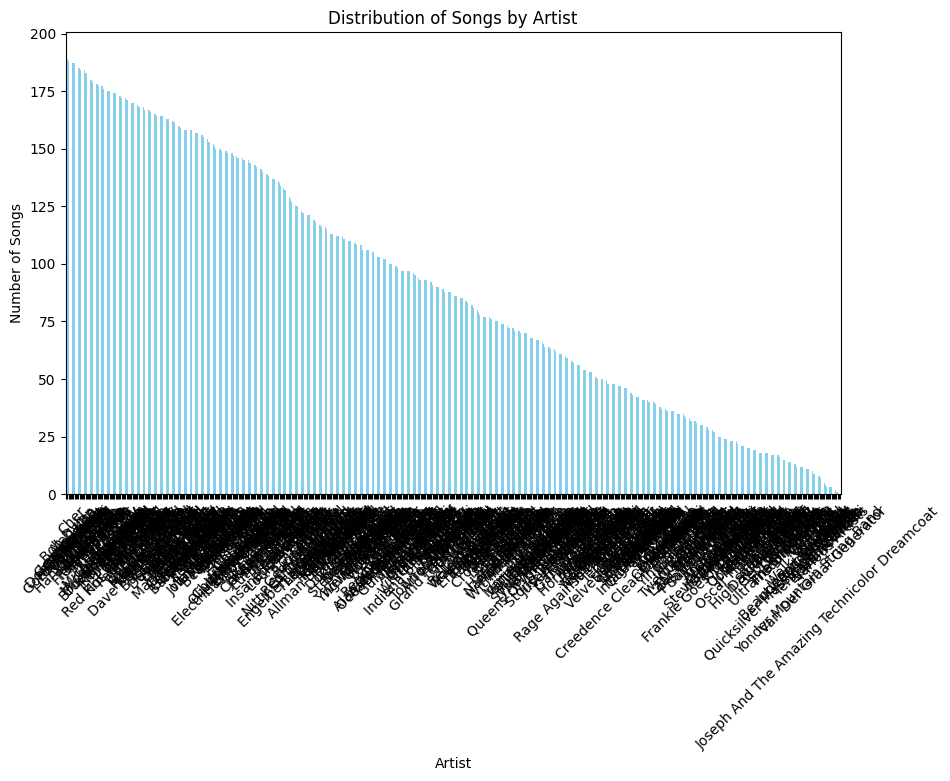

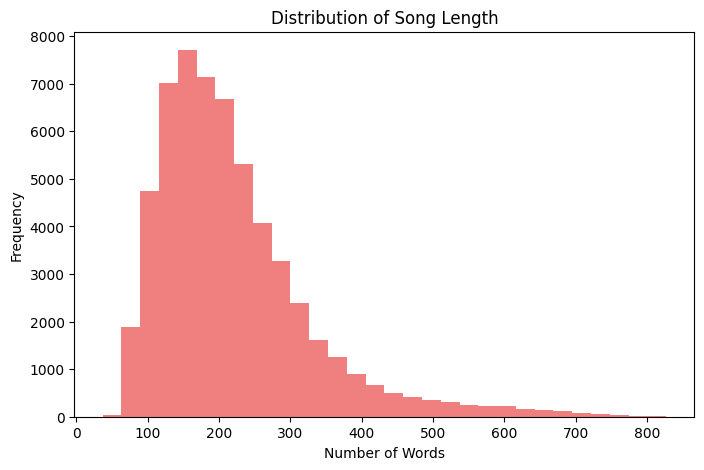

Most common words in the dataset:
    Word  Frequency
0      i     601165
1    the     497941
2    you     495159
3     to     296864
4    and     294571
5      a     255729
6     it     219447
7     me     204060
8     's     192269
9    n't     178859
10    my     170780
11    in     167646
12    of     140016
13  that     135020
14    do     134147
15  your     119663
16    on     113252
17    'm     105919
18    we     101213
19   all      98530


In [26]:
artist_counts = df['artist'].value_counts()
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Songs by Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


df['song_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
plt.hist(df['song_length'], bins=30, color='lightcoral')
plt.title('Distribution of Song Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

df['lemmatized_tokensS'] = df['filtered_sentence'].apply(lambda x: ' '.join(x))
all_words = ' '.join(df['lemmatized_tokensS'])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
print("Most common words in the dataset:")
print(common_words_df)

Saving the cleaned data

In [25]:
df.to_csv("cleaned_dataset3.csv", index=False)